<a href="https://colab.research.google.com/github/attilalr/Quantum-Physics/blob/main/Quantum_Physics_Infinite_Square_Well_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

from matplotlib import animation
from IPython.display import HTML

from functools import partial

In [13]:
# parâmetros

# x entre 0 e 1
a = 1

omega = 0.06
xdom = np.linspace(0, a, 200) # resolution 

### Funções

$$
\phi_n(x) = \sqrt{\frac{2}{a}} \sin \left( \frac{n \pi x}{a} \right)
$$

In [14]:
def phi_n(a, n, x):
    return np.sqrt(2)/a * np.sin(n*np.pi*x/a)

$$
\varphi_n(t) = e^{-in^2\omega t}
$$

In [15]:
def phi_time_n(omega, n, t):
    return np.exp(-1j*n**2*omega*t) # -1j para imaginário

### Figuras das funções $\phi_n(x)$

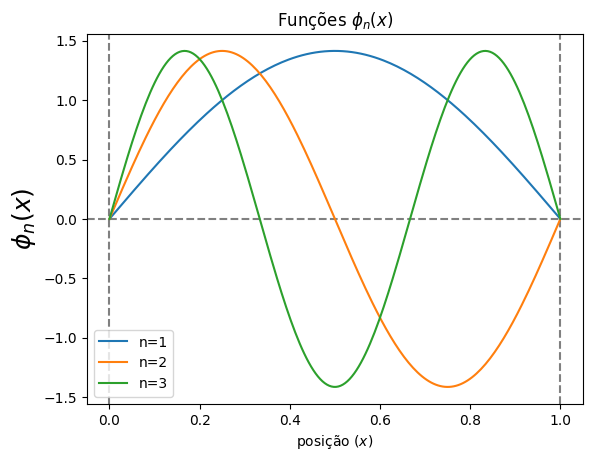

In [16]:
#
n_list = [1, 2, 3]


plt.axvline(x=0, linestyle='--', color='gray')
plt.axvline(x=a, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')

for n in n_list:
    plt.plot(xdom, phi_n(a, n, xdom), label=f'n={n}')

plt.title(r'Funções $\phi_n(x)$')
plt.xlabel(r'posição $(x)$')
plt.ylabel(r'$\phi_n(x)$', fontsize=18)
plt.legend()

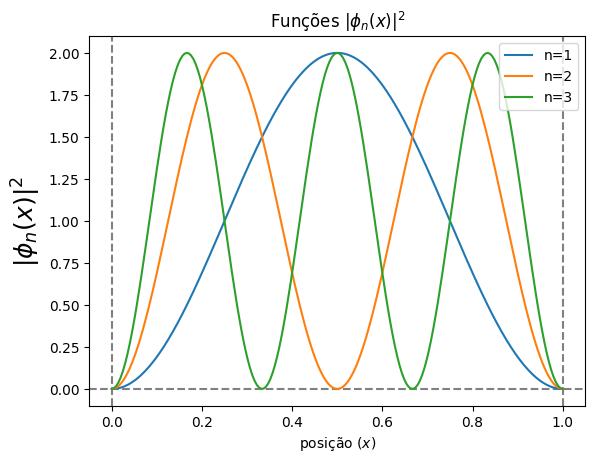

In [17]:
#
n_list = [1, 2, 3]

plt.axvline(x=0, linestyle='--', color='gray')
plt.axvline(x=a, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')

for n in n_list:
    plt.plot(xdom, phi_n(a, n, xdom)**2, label=f'n={n}')

plt.title(r'Funções $|\phi_n(x)|^2$')
plt.xlabel(r'posição $(x)$')
plt.ylabel(r'$|\phi_n(x)|^2$', fontsize=18)
plt.legend()

### Figuras função $\Psi$ com combinação linear (superposição dos $\phi_n$)

A: (0.31622776596120966+0j)


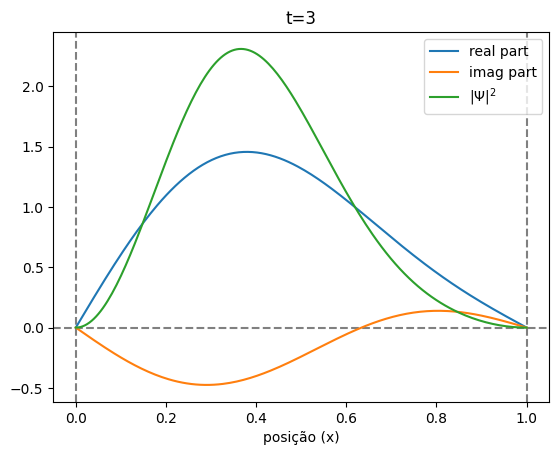

In [18]:
#n = 1
t = 3


# nossa definição principal
psi_final_function = lambda x, t: ( 3*phi_n(a, 1, x) * phi_time_n(omega, 1, t)   
                                   +phi_n(a, 2, x) * phi_time_n(omega, 2, t) 
                                   )   

mod_2_psi_final_function = lambda x, t: np.conjugate(psi_final_function(x, t))*np.real(psi_final_function(x, t))

# normalizar
# tenho que escolher um t para integrar
A = 1 / np.sqrt(integrate.quadrature(
    partial( mod_2_psi_final_function, t=0 ), 0.0, a,
    )[0])

print (f'A: {A}')

psi_f_y = A * psi_final_function(xdom, t)

plt.axvline(x=0, linestyle='--', color='gray')
plt.axvline(x=a, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')

plt.plot(xdom, np.real(psi_f_y), label='real part')
plt.plot(xdom, np.imag(psi_f_y), label='imag part')
plt.plot(xdom, np.conjugate(psi_f_y)*psi_f_y, label=r'$|\Psi|^2$')

plt.xlabel('posição (x)')
plt.title(f't={t}')

plt.legend()

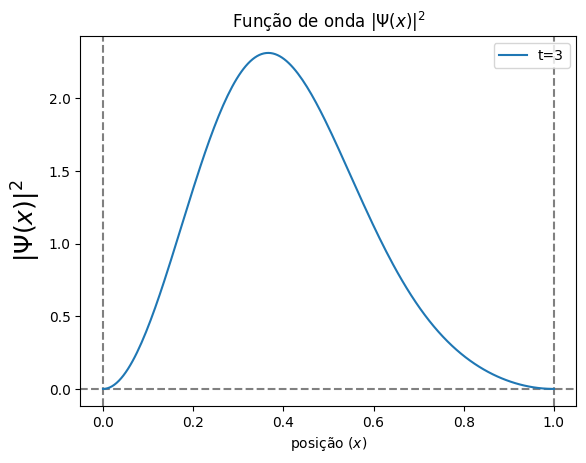

In [19]:
#
plt.axvline(x=0, linestyle='--', color='gray')
plt.axvline(x=a, linestyle='--', color='gray')
plt.axhline(y=0, linestyle='--', color='gray')

plt.plot(xdom, np.conjugate(A * psi_final_function(xdom, t))*(A * psi_final_function(xdom, t)) , label=f't={t}')

plt.title(r'Função de onda $|\Psi(x)|^2$')
plt.xlabel(r'posição $(x)$')
plt.ylabel(r'$|\Psi(x)|^2$', fontsize=18)
plt.legend()

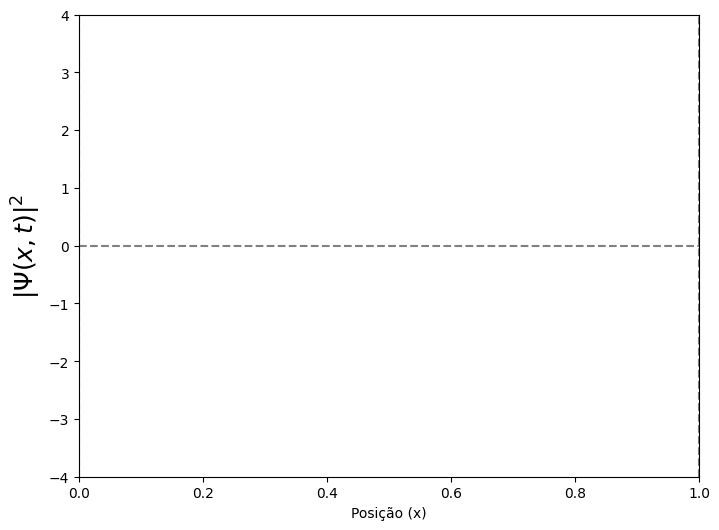

In [20]:

# create a figure and axes
fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(1,1,1)   

ax1.axvline(x=0, linestyle='--', color='gray')
ax1.axvline(x=a, linestyle='--', color='gray')
ax1.axhline(y=0, linestyle='--', color='gray')

# set up the subplots as needed
ax1.set_xlim(( 0, a))            
ax1.set_ylim(( -4, 4))
ax1.set_xlabel('Posição (x)')
ax1.set_ylabel(r'$|\Psi(x, t)|^2$', fontsize=18)

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects

line2, = ax1.plot([], [], 'r', lw=2) # real part
line3, = ax1.plot([], [], 'g', lw=2) # imag part

#ax1.legend(['sin','cos']);

# animation function. This is called sequentially
def drawframe(t):

    psi_f = A * psi_final_function(xdom, t)

    y1 = np.conjugate(psi_f)*psi_f
    y2 = np.real(psi_f)
    y3 = np.imag(psi_f)
    #y1 = np.sin(2 * np.pi * (x - 0.01 * n))


    line1.set_data(xdom, y1)
    line2.set_data(xdom, y2)
    line3.set_data(xdom, y3)

    txt_title.set_text('Frame = {0:4d}'.format(t))
    return (line1, line2, line3, txt_title)



In [21]:
# blit=True re-draws only the parts that have changed.

# 1 período
n_frames = int(2*np.pi/omega)
print (f'num de frames: {n_frames}')

anim = animation.FuncAnimation(fig, drawframe, frames=n_frames, interval=30, blit=True)

HTML(anim.to_html5_video())

num de frames: 104


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
